In [1]:
!pip install qrcode[pil] pillow


zsh:1: no matches found: qrcode[pil]


In [2]:
import io
import qrcode
from IPython.display import Image, display

def generate_qr(
    url: str,
    box_size: int = 10,
    border: int = 4,
    fill_color: str = "black",
    back_color: str = "white",
    filename: str = "qrcode.png"
):
    url = (url or "").strip()
    if not url:
        print("Please provide a URL or text.")
        return

    # Build QR code
    qr = qrcode.QRCode(
        version=1,
        error_correction=qrcode.constants.ERROR_CORRECT_H,
        box_size=box_size,
        border=border,
    )
    qr.add_data(url)
    qr.make(fit=True)

    img = qr.make_image(fill_color=fill_color, back_color=back_color).convert("RGB")

    # Save to memory for display
    buffer = io.BytesIO()
    img.save(buffer, format="PNG")
    buffer.seek(0)

    # Display inside notebook
    display(Image(buffer.getvalue()))

    # Save PNG locally
    with open(filename, "wb") as f:
        f.write(buffer.getvalue())

    print(f"QR Code saved as **{filename}**")


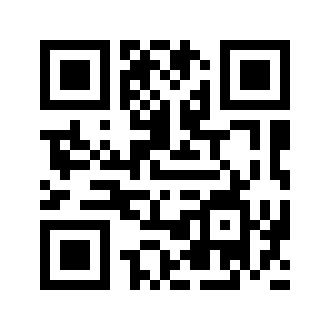

QR Code saved as **qrcode.png**


In [3]:
user_url = input("Enter URL or text to generate QR Code: ")
generate_qr(user_url)
